In [1]:
import pandas as pd

# ƒê·ªçc d·ªØ li·ªáu train v√† test ƒë√£ chu·∫©n h√≥a, m√£ h√≥a
df_train = pd.read_csv('../feature_engineering/data_train.csv')
df_test = pd.read_csv('../feature_engineering/data_test_final.csv')

# Gi·∫£ s·ª≠ trong file ch·ªâ ch·ª©a c√°c c·ªôt ƒë·∫∑c tr∆∞ng ƒë√£ chu·∫©n h√≥a, m√£ h√≥a
X_train = df_train.values
X_test = df_test.values

In [2]:
features = ['H√£ng S·∫£n Xu·∫•t','ƒê·ªô D√†y','Tr·ªçng L∆∞·ª£ng','B·ªô Nh·ªõ','Dung L∆∞·ª£ng Pin','Gi√° B√°n','S·ªë L√µi','Cache','ƒê·ªô Ph√¢n Gi·∫£i','H√£ng GPU']

X_train = df_train[features].values
X_test = df_test[features].values

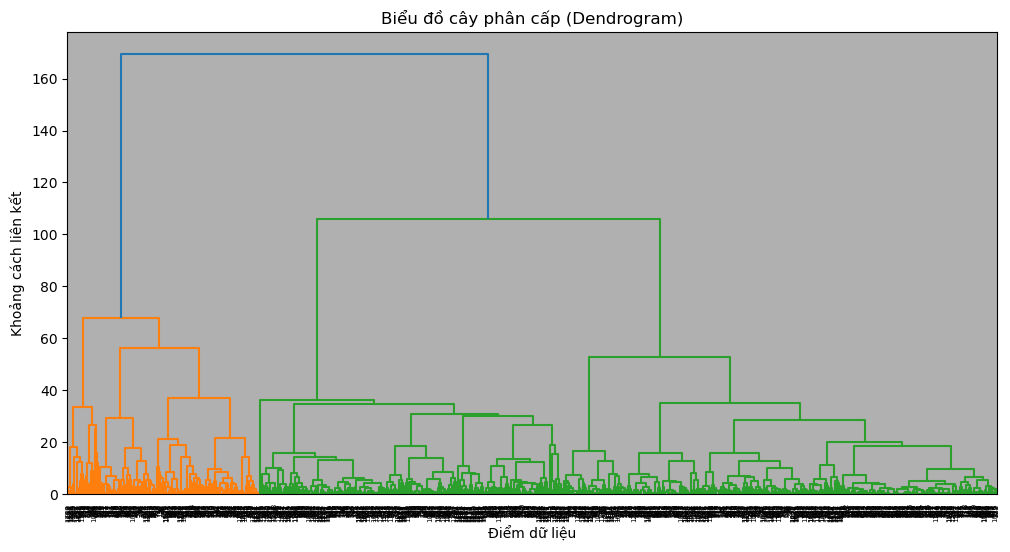

In [3]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# T√≠nh ma tr·∫≠n li√™n k·∫øt (linkage matrix)
linked = linkage(X_train, method='ward')

# V·∫Ω dendrogram
plt.figure(figsize=(12, 6), facecolor='white')
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False)
plt.title('Bi·ªÉu ƒë·ªì c√¢y ph√¢n c·∫•p (Dendrogram)')
plt.xlabel('ƒêi·ªÉm d·ªØ li·ªáu')
plt.ylabel('Kho·∫£ng c√°ch li√™n k·∫øt')
plt.grid(True)
plt.show()

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

linkage_options = ['ward', 'complete', 'average', 'single']
affinity_options = ['euclidean', 'manhattan', 'cosine']

# T·∫°o c√°c c·∫∑p h·ª£p l·ªá gi·ªØa linkage v√† affinity/metric
combinations = [
    (l, 'euclidean') if l == 'ward' else (l, a)
    for l in linkage_options
    for a in affinity_options if not (l == 'ward' and a != 'euclidean')
]
k=3
best_score = -1
best_params = None

for linkage, metric in combinations:
    model = AgglomerativeClustering(n_clusters=k, linkage=linkage, metric=metric)
    labels = model.fit_predict(X_train)
    
    score = silhouette_score(X_train, labels)
    print(f"Linkage: {linkage}, Metric: {metric}, Silhouette Score: {score:.3f}")
    
    if score > best_score:
        best_score = score
        best_params = (linkage, metric)

print("‚úÖ Best config:", best_params, "with Silhouette Score:", best_score)


Linkage: ward, Metric: euclidean, Silhouette Score: 0.312
Linkage: complete, Metric: euclidean, Silhouette Score: 0.573
Linkage: complete, Metric: manhattan, Silhouette Score: 0.463
Linkage: complete, Metric: cosine, Silhouette Score: 0.058
Linkage: average, Metric: euclidean, Silhouette Score: 0.711
Linkage: average, Metric: manhattan, Silhouette Score: 0.606
Linkage: average, Metric: cosine, Silhouette Score: 0.294
Linkage: single, Metric: euclidean, Silhouette Score: 0.711
Linkage: single, Metric: manhattan, Silhouette Score: 0.711
Linkage: single, Metric: cosine, Silhouette Score: 0.611
‚úÖ Best config: ('average', 'euclidean') with Silhouette Score: 0.7113160721394931


In [5]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
import numpy as np

k = 3  # s·ªë c·ª•m b·∫°n mu·ªën
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_train = agg.fit_predict(X_train)

# Th√™m c·ªôt nh√£n c·ª•m v√†o df_train
df_train['C·ª•m'] = labels_train

# T√≠nh t√¢m c·ª•m
centroids = np.array([X_train[labels_train == i].mean(axis=0) for i in range(k)])

# G√°n nh√£n cho t·∫≠p test theo centroid g·∫ßn nh·∫•t
distances = cdist(X_test, centroids)
labels_test = distances.argmin(axis=1)

# Th√™m c·ªôt nh√£n c·ª•m v√†o df_test
df_test['C·ª•m'] = labels_test

In [6]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Train Silhouette:", silhouette_score(X_train, labels_train))
print("Train DBI:", davies_bouldin_score(X_train, labels_train))
print("Train CHI:", calinski_harabasz_score(X_train, labels_train))

print("Test Silhouette:", silhouette_score(X_test, labels_test))
print("Test DBI:", davies_bouldin_score(X_test, labels_test))
print("Test CHI:", calinski_harabasz_score(X_test, labels_test))


Train Silhouette: 0.31151995146368033
Train DBI: 1.1042505424295976
Train CHI: 666.1769375115636
Test Silhouette: 0.3443137354416479
Test DBI: 0.9928134488774513
Test CHI: 268.05272190452445


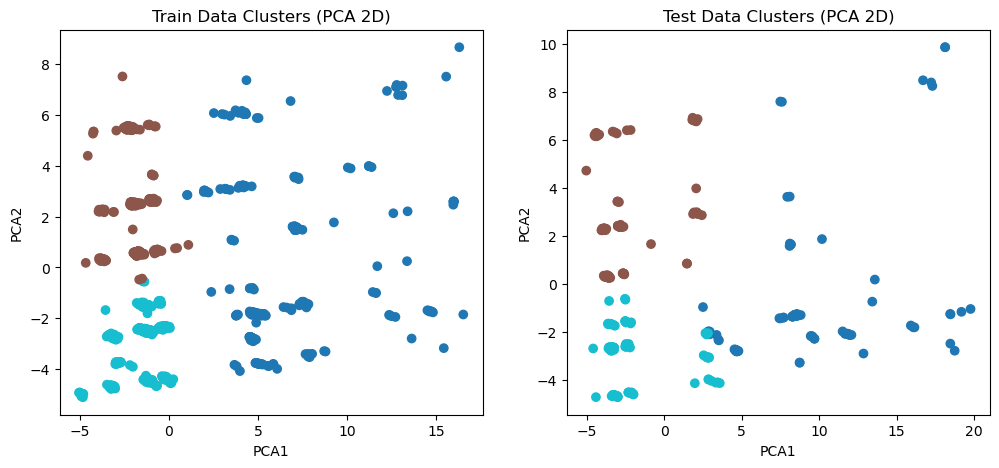

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Gi·∫£m chi·ªÅu d·ªØ li·ªáu xu·ªëng 2D cho train v√† test
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# V·∫Ω scatter plot train
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=labels_train, cmap='tab10')
plt.title("Train Data Clusters (PCA 2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

# V·∫Ω scatter plot test
plt.subplot(1,2,2)
plt.scatter(X_test_2d[:,0], X_test_2d[:,1], c=labels_test, cmap='tab10')
plt.title("Test Data Clusters (PCA 2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

plt.show()


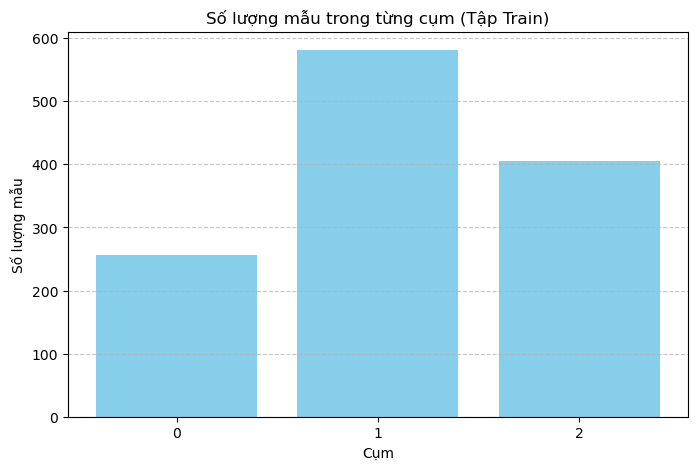

In [8]:
import matplotlib.pyplot as plt

# ƒê·∫øm s·ªë m·∫´u theo c·ª•m trong t·∫≠p train
cluster_counts = df_train['C·ª•m'].value_counts().sort_index()

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')

plt.xlabel('C·ª•m')
plt.ylabel('S·ªë l∆∞·ª£ng m·∫´u')
plt.title('S·ªë l∆∞·ª£ng m·∫´u trong t·ª´ng c·ª•m (T·∫≠p Train)')
plt.xticks(cluster_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\toanm\AppData\Local\Temp\ipykernel_15752\2323125089.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spreads, y=features, palette='viridis')


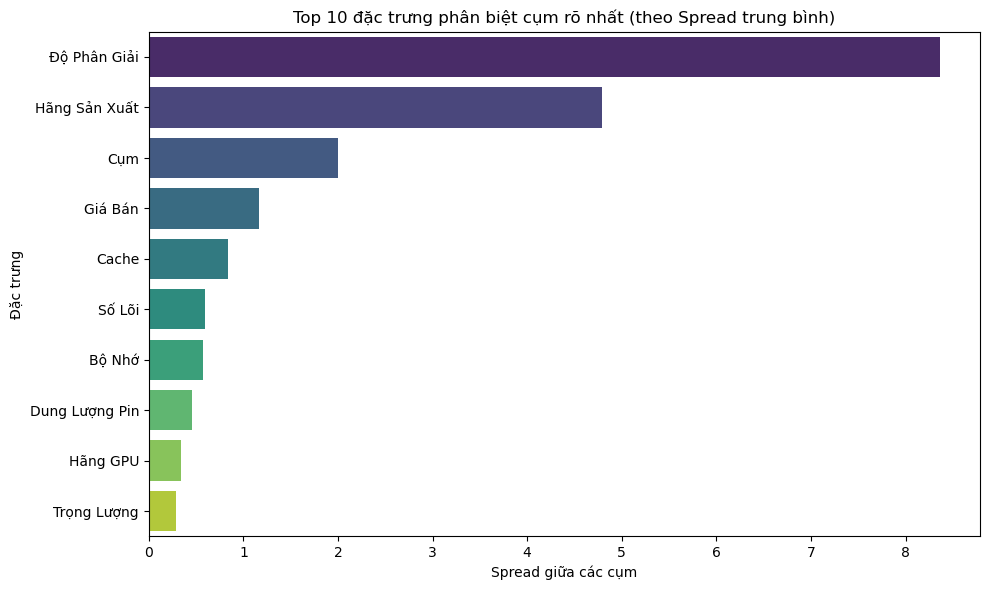

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# L·ªçc c√°c c·ªôt s·ªë (lo·∫°i float ho·∫∑c int)
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
if 'ID' in numeric_cols:
    numeric_cols.remove('ID')

# T√≠nh ƒë·ªô ch√™nh l·ªách gi√° tr·ªã trung b√¨nh gi·ªØa c√°c c·ª•m cho m·ªói ƒë·∫∑c tr∆∞ng
spread_scores = {}

for col in numeric_cols:
    group_means = df_train.groupby('C·ª•m')[col].mean()
    spread = group_means.max() - group_means.min()
    spread_scores[col] = spread

# S·∫Øp x·∫øp ƒë·∫∑c tr∆∞ng theo ƒë·ªô ch√™nh l·ªách gi·∫£m d·∫ßn
sorted_features = sorted(spread_scores.items(), key=lambda x: x[1], reverse=True)
top_features = sorted_features[:10]

# T√°ch t√™n ƒë·∫∑c tr∆∞ng v√† gi√° tr·ªã spread
features, spreads = zip(*top_features)

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 6))
sns.barplot(x=spreads, y=features, palette='viridis')
plt.title('Top 10 ƒë·∫∑c tr∆∞ng ph√¢n bi·ªát c·ª•m r√µ nh·∫•t (theo Spread trung b√¨nh)')
plt.xlabel('Spread gi·ªØa c√°c c·ª•m')
plt.ylabel('ƒê·∫∑c tr∆∞ng')
plt.tight_layout()
plt.show()


üìä Trung b√¨nh ƒë·∫∑c tr∆∞ng theo c·ª•m:
     ƒê·ªô Ph√¢n Gi·∫£i  H√£ng S·∫£n Xu·∫•t  C·ª•m  Gi√° B√°n  Cache  S·ªë L√µi  B·ªô Nh·ªõ  \
C·ª•m                                                                     
0           12.11           3.64  0.0     0.89   0.57    0.40    0.27   
1            4.02           6.43  1.0    -0.28  -0.27   -0.20   -0.30   
2            3.75           1.64  2.0    -0.17   0.03    0.02    0.26   

     Dung L∆∞·ª£ng Pin  H√£ng GPU  Tr·ªçng L∆∞·ª£ng  
C·ª•m                                         
0              0.31      2.70         0.03  
1             -0.14      2.37        -0.13  
2              0.01      2.45         0.16  


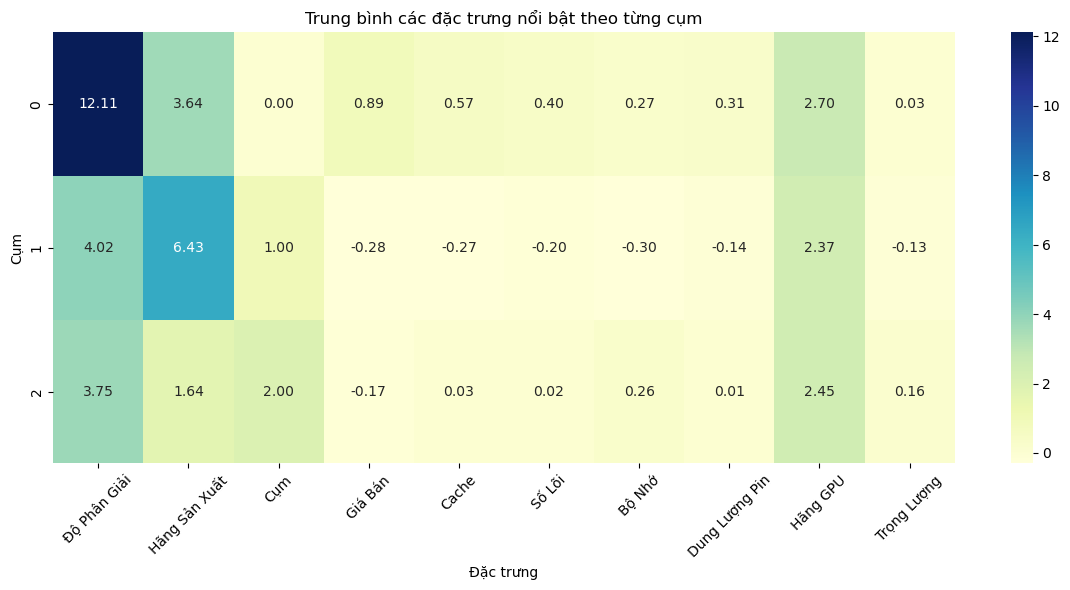

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# T√°ch t√™n ƒë·∫∑c tr∆∞ng t·ª´ top_features
top_feature_names = [feat for feat, spread in top_features]

# T√≠nh trung b√¨nh c√°c ƒë·∫∑c tr∆∞ng theo c·ª•m
cluster_summary = df_train.groupby('C·ª•m')[top_feature_names].mean().round(2)
print("üìä Trung b√¨nh ƒë·∫∑c tr∆∞ng theo c·ª•m:")
print(cluster_summary)

# V·∫Ω heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Trung b√¨nh c√°c ƒë·∫∑c tr∆∞ng n·ªïi b·∫≠t theo t·ª´ng c·ª•m")
plt.xlabel("ƒê·∫∑c tr∆∞ng")
plt.ylabel("C·ª•m")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

df_raw = pd.read_csv('../clean_data/clean_data_train/filled_data.csv')

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# N·ªëi d·ªØ li·ªáu g·ªëc v·ªõi nh√£n c·ª•m
df_merged = pd.merge(df_raw, df_train[['ID', 'C·ª•m']], on='ID', how='inner')
columns_needed = ['H√£ng S·∫£n Xu·∫•t', 'ƒê·ªô D√†y', 'Tr·ªçng L∆∞·ª£ng', 'B·ªô Nh·ªõ', 'Dung L∆∞·ª£ng Pin',
                  'Gi√° B√°n', 'S·ªë L√µi', 'Cache', 'ƒê·ªô Ph√¢n Gi·∫£i', 'H√£ng GPU', 'C·ª•m']

df_selected = df_merged[columns_needed].copy()
# Ph√¢n t√°ch c·ªôt numeric v√† categorical
numeric_cols = df_selected.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_selected.select_dtypes(include=['object', 'category']).columns.tolist()



C:\Users\toanm\AppData\Local\Temp\ipykernel_15752\1770986089.py:45: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\toanm\AppData\Local\Temp\ipykernel_15752\1770986089.py:45: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\toanm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\toanm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


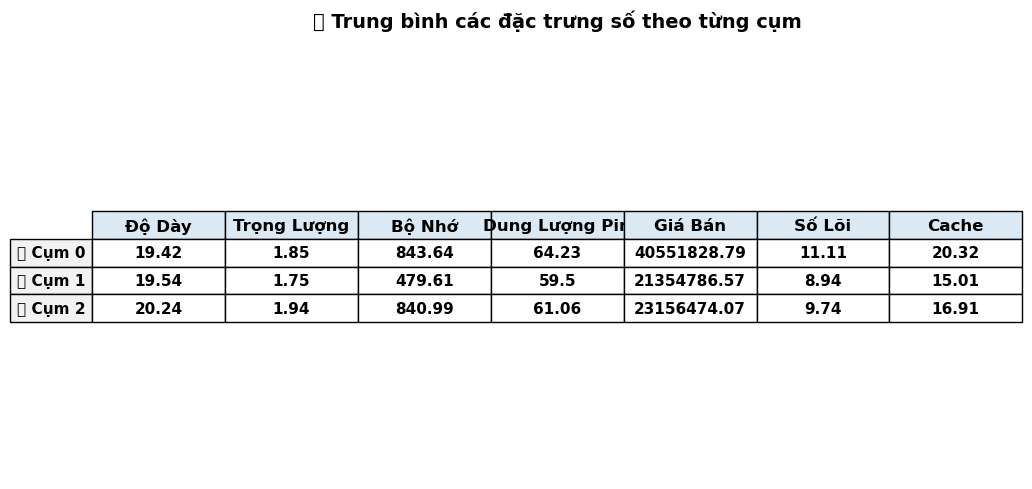

In [13]:
numeric_summary = df_selected.groupby('C·ª•m')[numeric_cols].mean().round(2)

# N·∫øu mu·ªën ch·∫Øc ch·∫Øn kh√¥ng c√≥ c·ªôt 'C·ª•m' (th∆∞·ªùng kh√¥ng c√≥)
if 'C·ª•m' in numeric_summary.columns:
    numeric_summary = numeric_summary.drop(columns=['C·ª•m'])

def mode_func(x):
    return x.mode().iloc[0] if not x.mode().empty else pd.NA

categorical_summary = df_selected.groupby('C·ª•m')[categorical_cols].agg(mode_func)
categorical_summary = df_selected.groupby('C·ª•m')[categorical_cols].agg(mode_func)

# --- B∆∞·ªõc 4: Bi·ªÉu di·ªÖn numeric_summary d·∫°ng b·∫£ng ch·ªØ ƒë·∫πp m·∫Øt ---
fig, ax = plt.subplots(figsize=(len(numeric_summary.columns) * 1.5, numeric_summary.shape[0] + 2))
ax.axis('off')

# T·∫°o n·ªôi dung b·∫£ng
table = ax.table(
    cellText=numeric_summary.values,
    rowLabels=[f'üü¢ C·ª•m {i}' for i in numeric_summary.index],
    colLabels=numeric_summary.columns,
    cellLoc='center',
    loc='center'
)

# T√πy ch·ªânh font v√† layout
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.5)

# L√†m n·ªïi b·∫≠t ti√™u ƒë·ªÅ c·ªôt
for (row, col), cell in table.get_celld().items():
    cell.set_text_props(ha='center', va='center', fontweight='bold')

    # T√¥ m√†u header h√†ng ƒë·∫ßu
    if row == 0:
        cell.set_facecolor('#dbe9f4')
        cell.set_fontsize(12)
    # T√¥ m√†u h√†ng c·ª•m (label)
    if col == -1:
        cell.set_facecolor('#f2f2f2')
        cell.set_fontsize(11)

plt.title("üìä Trung b√¨nh c√°c ƒë·∫∑c tr∆∞ng s·ªë theo t·ª´ng c·ª•m", fontsize=14, weight='bold', pad=20)
plt.tight_layout()
plt.show()

C:\Users\toanm\AppData\Local\Temp\ipykernel_15752\2656372707.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded = data.applymap(lambda x: val_to_int.get(x, -1))
C:\Users\toanm\AppData\Local\Temp\ipykernel_15752\2656372707.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\toanm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


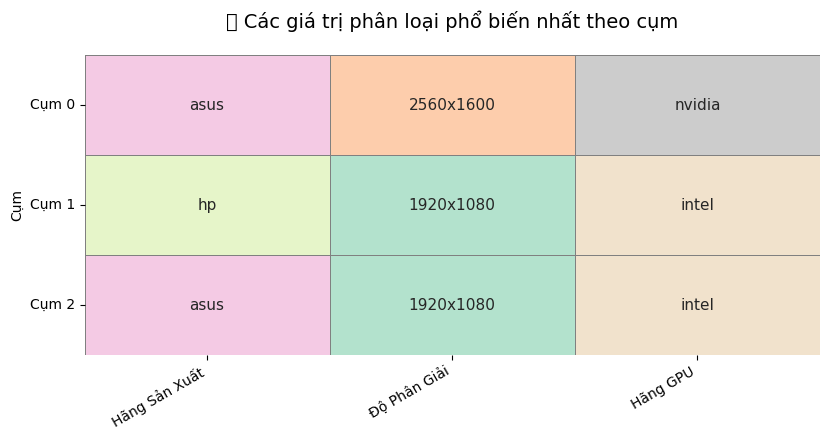

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# D·ªØ li·ªáu
data = categorical_summary.copy()

# M√£ h√≥a c√°c gi√° tr·ªã ph√¢n lo·∫°i th√†nh s·ªë nguy√™n ƒë·ªÉ t√¥ m√†u
unique_vals = sorted(set(data.values.ravel()))
val_to_int = {val: i for i, val in enumerate(unique_vals)}

# Ma tr·∫≠n m√£ h√≥a s·ªë
encoded = data.applymap(lambda x: val_to_int.get(x, -1))

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(len(data.columns) * 2.8, len(data.index) * 1.5))
ax = sns.heatmap(
    encoded,
    cmap='Pastel2',
    cbar=False,
    linewidths=0.5,
    linecolor='gray',
    annot=data.values,
    fmt='',
    annot_kws={"size": 11},
    xticklabels=data.columns,
    yticklabels=[f'C·ª•m {i}' for i in data.index]
)

plt.title("üìä C√°c gi√° tr·ªã ph√¢n lo·∫°i ph·ªï bi·∫øn nh·∫•t theo c·ª•m", fontsize=14, pad=20)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()